In [1]:
# Etapa 1 - Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Etapa 2 - Carregar dados
df = pd.read_csv("clientes_seguradora.csv")
df.head()

,ID,Idade,Genero,Estado_Civil,Rendimento_Anual,Numero_Polices,Valor_Total_Seguro,Score_Satisfacao,Tipo_Cliente
0,1,27,Masculino,Divorciado,95654.95,2,365298.98,78,Premium
1,2,48,Masculino,Casado,87062.33,2,460114.57,93,Premium
2,3,32,Masculino,Solteiro,48249.23,1,585499.91,52,Standard
3,4,69,Feminino,Divorciado,88607.50,1,40765.50,42,Economy
4,5,40,Masculino,Solteiro,85610.62,1,109100.38,61,Standard


In [3]:
# Etapa 3 - Separar features e alvo
X = df.drop(["ID", "Tipo_Cliente"], axis=1)
y = df["Tipo_Cliente"]

In [4]:
# Etapa 4 - Definir colunas categóricas e numéricas
categorical_cols = ["Genero", "Estado_Civil"]
numerical_cols = ["Idade", "Rendimento_Anual", "Numero_Polices", "Valor_Total_Seguro", "Score_Satisfacao"]

In [5]:
# Etapa 5 - Criar pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [6]:
# Etapa 6 - Pipeline completo
pipeline = Pipeline(steps=[
    ("preprocessamento", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

In [7]:
# Etapa 7 - Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Etapa 8 - Treinar modelo
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)


In [9]:
# Etapa 9 - Avaliação do modelo
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, zero_division=0))

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acuracia:.2f}")

Relatório de Classificação:

              precision    recall  f1-score   support

    Affluent       0.00      0.00      0.00         1
     Economy       0.65      0.50      0.56        22
     Premium       0.50      0.67      0.57         9
    Standard       0.55      0.61      0.58        28

    accuracy                           0.57        60
   macro avg       0.42      0.44      0.43        60
weighted avg       0.57      0.57      0.56        60

Acurácia no conjunto de teste: 0.57


In [10]:
# Etapa 10 - Validação cruzada com 5 folds
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Acurácias por fold:")
print(scores)
print(f"\nAcurácia média: {scores.mean():.2f}")
print(f"Desvio padrão: {scores.std():.2f}")

Acurácias por fold:
[0.68333333 0.63333333 0.68333333 0.65       0.68333333]

Acurácia média: 0.67
Desvio padrão: 0.02


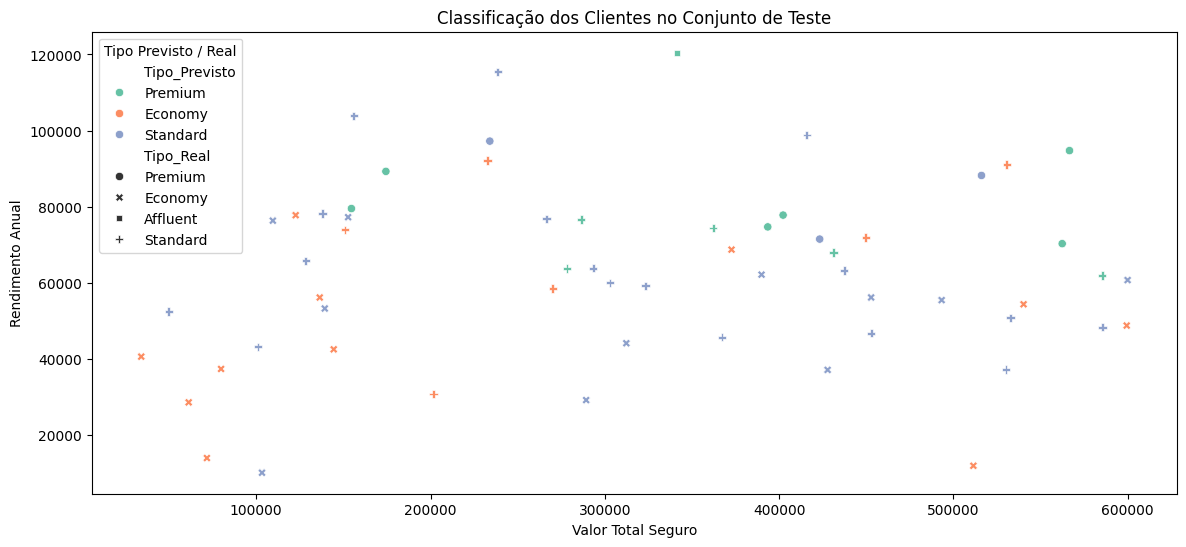

In [16]:
# Etapa 11 - Gráfico com clientes do conjunto de teste
X_test_plot = X_test.copy()
X_test_plot["Tipo_Real"] = y_test.values
X_test_plot["Tipo_Previsto"] = y_pred

plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=X_test_plot,
    x="Valor_Total_Seguro",
    y="Rendimento_Anual",
    hue="Tipo_Previsto",
    style="Tipo_Real",
    palette="Set2"
)
plt.title("Classificação dos Clientes no Conjunto de Teste")
plt.xlabel("Valor Total Seguro")
plt.ylabel("Rendimento Anual")
plt.legend(title="Tipo Previsto / Real")
plt.show()

In [12]:
# Etapa 12 - Novo cliente(s) hipotético(s)
novos_clientes = pd.read_csv("clientes_seguradora_novo.csv")

# Prever o tipo de cliente
tipos_previstos_novos = pipeline.predict(novos_clientes)
novos_clientes["Tipo_Previsto"] = tipos_previstos_novos

# Mostrar tabela
print("Classificação dos novos clientes:")
display(novos_clientes.head())

Classificação dos novos clientes:


,ID,Idade,Genero,Estado_Civil,Rendimento_Anual,Numero_Polices,Valor_Total_Seguro,Score_Satisfacao,Tipo_Cliente,Tipo_Previsto
0,1,20,Feminino,Casado,44457.51,6,332994.72,89,Standard,Standard
1,2,40,Masculino,Casado,12472.62,3,108324.10,58,Economy,Economy
2,3,41,Feminino,Divorciado,91057.39,5,397691.37,51,Standard,Standard
3,4,66,Masculino,Solteiro,75160.39,2,97034.29,43,Economy,Standard
4,5,58,Feminino,Divorciado,78275.66,3,257599.94,93,Premium,Premium


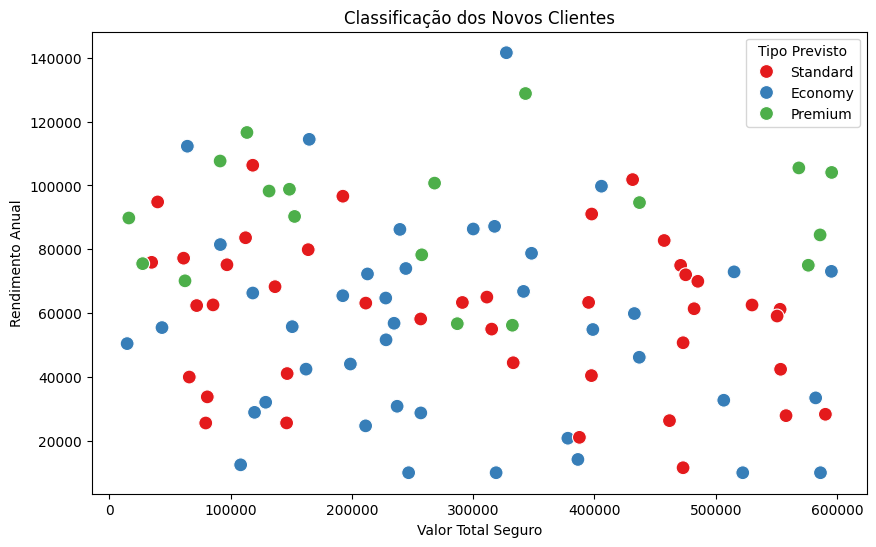

In [13]:
# Etapa 13 - Gráfico dos novos clientes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=novos_clientes,
    x="Valor_Total_Seguro",
    y="Rendimento_Anual",
    hue="Tipo_Previsto",
    palette="Set1",
    s=100
)
plt.title("Classificação dos Novos Clientes")
plt.xlabel("Valor Total Seguro")
plt.ylabel("Rendimento Anual")
plt.legend(title="Tipo Previsto")
plt.show()